In [2]:
import torch.nn as nn
import torch.nn.functional as F
import torch
import nibabel as nib
import matplotlib.pyplot as plt

import pickle
import os
import numpy as np
import pandas as pd
import shutil

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:

def plot_X_Y_Y_pred_Tens(X_tensor, y_tensor, slice_v=65, y_pred=None):
    
    if(len(y_tensor.shape) == 4):
        y_tensor = torch.argmax(y_tensor, dim=0)
        
    if(y_pred is not None and len(y_pred.shape) == 4):
        y_pred = torch.argmax(y_pred, dim=0)
    # Load the images
    
    
    seg = y_tensor[:,:,slice_v].cpu().numpy()
    
    y_pred = y_pred[:,:,slice_v].cpu().numpy()
    
    t1c = X_tensor[0,:,:,slice_v].cpu().numpy()
    t1n = X_tensor[1,:,:,slice_v].cpu().numpy()
    t2f = X_tensor[2,:,:,slice_v].cpu().numpy()
    t2w = X_tensor[3,:,:,slice_v].cpu().numpy()
    
    if(y_pred is None):
        fig, axs = plt.subplots(1, 5, figsize=(15, 3))
        
        axs[0].imshow(t1c, cmap='gray')
        axs[0].set_title('T1C')

        axs[1].imshow(t1n, cmap='gray')
        axs[1].set_title('T1N')

        axs[2].imshow(t2f, cmap='gray')
        axs[2].set_title('T2F')

        axs[3].imshow(t2w, cmap='gray')
        axs[3].set_title('T2W')
        
        axs[4].imshow(seg)
        axs[4].set_title('Segmentation')

        for ax in axs:
            ax.axis('off')

        plt.show()
    else:
        fig, axs = plt.subplots(1, 6, figsize=(15, 3))

        axs[0].imshow(t1c, cmap='gray')
        axs[0].set_title('T1C')

        axs[1].imshow(t1n, cmap='gray')
        axs[1].set_title('T1N')

        axs[2].imshow(t2f, cmap='gray')
        axs[2].set_title('T2F')

        axs[3].imshow(t2w, cmap='gray')
        axs[3].set_title('T2W')
        
        axs[4].imshow(seg)
        axs[4].set_title('Segmentation')

        axs[5].imshow(y_pred)
        axs[5].set_title('Predicted Segmentation')

        for ax in axs:
            ax.axis('off')

        plt.show()

In [4]:

def plot_X_Y_Y_pred(fileName, slice_v=65, y_pred=None):
    
    path = '/kaggle/input/trainingdata-brats-part1/'+fileName+'/'+fileName
    # Load the images
    seg = nib.load(path + '-seg.nii').get_fdata()
    t1c = nib.load(path + '-t1c.nii').get_fdata()
    t1n = nib.load(path + '-t1n.nii').get_fdata()
    t2f = nib.load(path + '-t2f.nii').get_fdata()
    t2w = nib.load(path + '-t2w.nii').get_fdata()
    
    if(y_pred is None):
        fig, axs = plt.subplots(1, 5, figsize=(15, 3))
        
#         cmap = plt.cm.get_cmap('tab10', 4)  # 4 classes

        axs[4].imshow(seg[:, :, slice_v])
        axs[4].set_title('Segmentation')

        axs[0].imshow(t1c[:, :, slice_v], cmap='gray')
        axs[0].set_title('T1C')

        axs[1].imshow(t1n[:, :, slice_v], cmap='gray')
        axs[1].set_title('T1N')

        axs[2].imshow(t2f[:, :, slice_v], cmap='gray')
        axs[2].set_title('T2F')

        axs[3].imshow(t2w[:, :, slice_v], cmap='gray')
        axs[3].set_title('T2W')

        for ax in axs:
            ax.axis('off')

        plt.show()
    else:
        fig, axs = plt.subplots(1, 6, figsize=(15, 3))

        axs[0].imshow(t1c[:, :, slice_v], cmap='gray')
        axs[0].set_title('T1C')

        axs[1].imshow(t1n[:, :, slice_v], cmap='gray')
        axs[1].set_title('T1N')

        axs[2].imshow(t2f[:, :, slice_v], cmap='gray')
        axs[2].set_title('T2F')

        axs[3].imshow(t2w[:, :, slice_v], cmap='gray')
        axs[3].set_title('T2W')

        
#         cmap = plt.cm.get_cmap('tab10', 4)  # 4 classes

        axs[4].imshow(seg[:, :, slice_v])
        axs[4].set_title('Segmentation')
        
#         cmap2 = plt.cm.get_cmap('tab10', y_pred_kval)

        axs[5].imshow(y_pred[:, :, slice_v])
        axs[5].set_title('Predicted Segmentation')

        for ax in axs:
            ax.axis('off')

        plt.show()

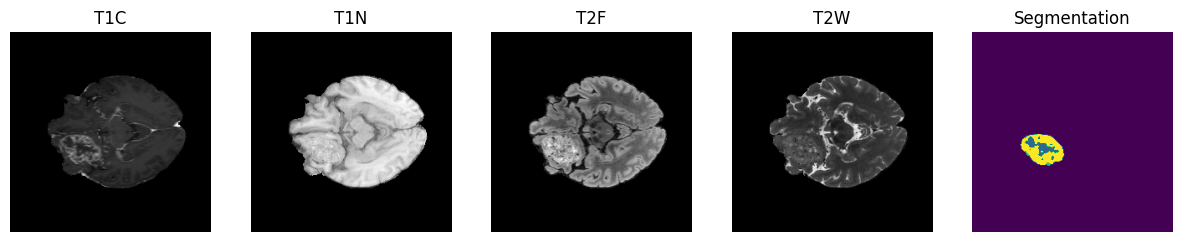

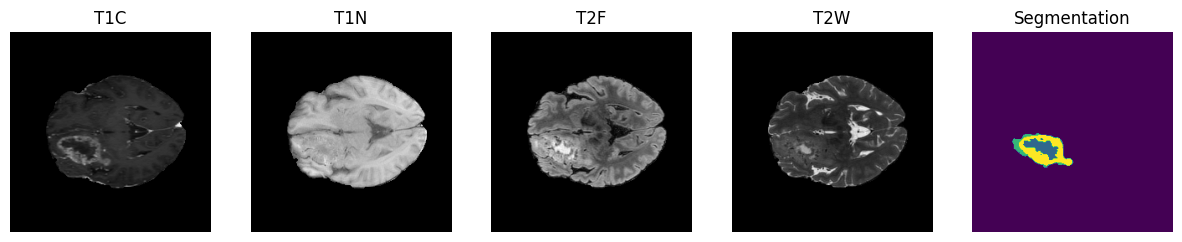

In [5]:
plot_X_Y_Y_pred("BraTS-GLI-00000-000",slice_v=60)
plot_X_Y_Y_pred("BraTS-GLI-00000-000",slice_v=65)

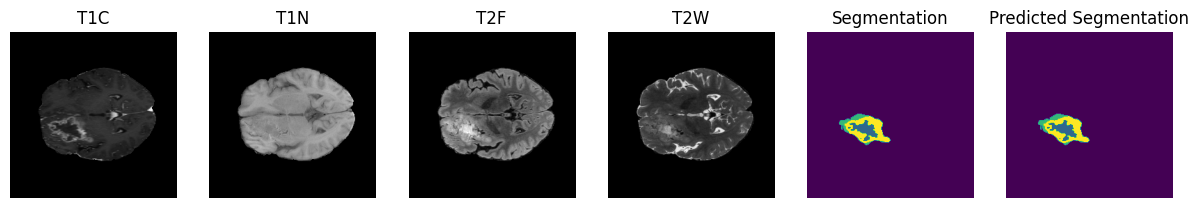

In [6]:
y_pred = nib.load('/kaggle/input/trainingdata-brats-part1/BraTS-GLI-00000-000/BraTS-GLI-00000-000-seg.nii').get_fdata()
plot_X_Y_Y_pred("BraTS-GLI-00000-000",slice_v=70,y_pred=y_pred)

In [7]:

# Figure out what num representing which class
'''

0 --> The purple one
1 --> Inner one (Navy blue)
2 --> Outer one (Green) 
3 --> Yellow


below code snippet was used to determine and some EDA


y_pred_erasing_1 = np.copy(y_pred)
y_pred_erasing_1[y_pred_erasing_1 == 3] = 0
y_pred_erasing_1[y_pred_erasing_1 == 2] = 0
y_pred_erasing_1[y_pred_erasing_1 == 1] = 0

np.unique(y_pred),np.unique(y_pred_erasing_1)

y_pred = nib.load('/kaggle/input/trainingdata-brats-part1/BraTS-GLI-00000-000/BraTS-GLI-00000-000-seg.nii').get_fdata()
plot_X_Y_Y_pred("BraTS-GLI-00000-000",slice_v=70,y_pred=y_pred_erasing_1)

'''

np.unique(y_pred)

array([0., 1., 2., 3.])

In [8]:
# adapt from https://github.com/MIC-DKFZ/BraTS2017
def normalization(planes, norm='gn'):
    if norm == 'bn':
        m = nn.BatchNorm3d(planes)
    elif norm == 'gn':
        m = nn.GroupNorm(8, planes)
    elif norm == 'in':
        m = nn.InstanceNorm3d(planes)
    else:
        raise ValueError('normalization type {} is not supported'.format(norm))
    return m



class InitConv(nn.Module):
    def __init__(self, in_channels=4, out_channels=16, dropout=0.2):
        super(InitConv, self).__init__()

        self.conv = nn.Conv3d(in_channels, out_channels, kernel_size=3, padding=1)
        self.dropout = dropout

    def forward(self, x):
        y = self.conv(x)
        y = F.dropout3d(y, self.dropout)

        return y


In [9]:

class EnBlock(nn.Module):
    def __init__(self, in_channels, norm='gn'):
        super(EnBlock, self).__init__()

        self.bn1 = normalization(in_channels, norm=norm)
        self.relu1 = nn.ReLU(inplace=True)
        self.conv1 = nn.Conv3d(in_channels, in_channels, kernel_size=3, padding=1)

        self.bn2 = normalization(in_channels, norm=norm)
        self.relu2 = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv3d(in_channels, in_channels, kernel_size=3, padding=1)

    def forward(self, x):
        x1 = self.bn1(x)
        x1 = self.relu1(x1)
        x1 = self.conv1(x1)
        
        y = self.bn2(x1)
        y = self.relu2(y)
        y = self.conv2(y)
        
        y = y + x

        return y


class EnDown(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(EnDown, self).__init__()
        self.conv = nn.Conv3d(in_channels, out_channels, kernel_size=3, stride=2, padding=1)

    def forward(self, x):
        y = self.conv(x)
        return y

In [10]:


class Unet(nn.Module):
    def __init__(self, in_channels=4, base_channels=16, num_classes=4):
        super(Unet, self).__init__()

        self.InitConv = InitConv(in_channels=in_channels, out_channels=base_channels, dropout=0.2)
        self.EnBlock1 = EnBlock(in_channels=base_channels)
        self.EnDown1 = EnDown(in_channels=base_channels, out_channels=base_channels*2)

        self.EnBlock2_1 = EnBlock(in_channels=base_channels*2)
        self.EnBlock2_2 = EnBlock(in_channels=base_channels*2)
        self.EnDown2 = EnDown(in_channels=base_channels*2, out_channels=base_channels*4)

        self.EnBlock3_1 = EnBlock(in_channels=base_channels * 4)
        self.EnBlock3_2 = EnBlock(in_channels=base_channels * 4)
        self.EnDown3 = EnDown(in_channels=base_channels*4, out_channels=base_channels*8)

        self.EnBlock4_1 = EnBlock(in_channels=base_channels * 8)
        self.EnBlock4_2 = EnBlock(in_channels=base_channels * 8)
        self.EnBlock4_3 = EnBlock(in_channels=base_channels * 8)
        self.EnBlock4_4 = EnBlock(in_channels=base_channels * 8)

    def forward(self, x):
        x = self.InitConv(x)       # (1, 16, 128, 128, 128)

        x1_1 = self.EnBlock1(x)
        x1_2 = self.EnDown1(x1_1)  # (1, 32, 64, 64, 64)

        x2_1 = self.EnBlock2_1(x1_2)
        x2_1 = self.EnBlock2_2(x2_1)
        x2_2 = self.EnDown2(x2_1)  # (1, 64, 32, 32, 32)

        x3_1 = self.EnBlock3_1(x2_2)
        x3_1 = self.EnBlock3_2(x3_1)
        x3_2 = self.EnDown3(x3_1)  # (1, 128, 16, 16, 16)

        x4_1 = self.EnBlock4_1(x3_2)
        x4_2 = self.EnBlock4_2(x4_1)
        x4_3 = self.EnBlock4_3(x4_2)
        output = self.EnBlock4_4(x4_3)  # (1, 128, 16, 16, 16)

        return x1_1,x2_1,x3_1,output


In [11]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device: ",device)

with torch.no_grad():
    x = torch.rand((1, 4, 128, 128, 128), device=device)
    # model = Unet1(in_channels=4, base_channels=16, num_classes=4)
    model = Unet(in_channels=4, base_channels=16, num_classes=4)
    model.to(device)
    output = model(x)
    print("Output Shapes: ")
    for op in output:
        print(op.shape)

Device:  cuda
Output Shapes: 
torch.Size([1, 16, 128, 128, 128])
torch.Size([1, 32, 64, 64, 64])
torch.Size([1, 64, 32, 32, 32])
torch.Size([1, 128, 16, 16, 16])


In [12]:
class HEDfor3D(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.line1 = torch.nn.Sequential(
            torch.nn.Conv3d(in_channels=4, out_channels=64, kernel_size=3, stride=1, padding=1),
            torch.nn.LeakyReLU(inplace=True),
            torch.nn.Conv3d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
            torch.nn.LeakyReLU(inplace=True)
        )

        self.line2 = torch.nn.Sequential(
            torch.nn.MaxPool3d(kernel_size=2, stride=2),
            torch.nn.Conv3d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            torch.nn.LeakyReLU(inplace=True),
            torch.nn.Conv3d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
            torch.nn.LeakyReLU(inplace=True)
        )

        self.line3 = torch.nn.Sequential(
            torch.nn.MaxPool3d(kernel_size=2, stride=2),
            torch.nn.Conv3d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
            torch.nn.LeakyReLU(inplace=True),
            torch.nn.Conv3d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            torch.nn.LeakyReLU(inplace=True),
            torch.nn.Conv3d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            torch.nn.LeakyReLU(inplace=True)
        )

        self.line4 = torch.nn.Sequential(
            torch.nn.MaxPool3d(kernel_size=2, stride=2),
            torch.nn.Conv3d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1),
            torch.nn.LeakyReLU(inplace=True),
            torch.nn.Conv3d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            torch.nn.LeakyReLU(inplace=True),
            torch.nn.Conv3d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            torch.nn.LeakyReLU(inplace=True)
        )

        self.line5 = torch.nn.Sequential(
            torch.nn.MaxPool3d(kernel_size=2, stride=2),
            torch.nn.Conv3d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            torch.nn.LeakyReLU(inplace=True),
            torch.nn.Conv3d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            torch.nn.LeakyReLU(inplace=True),
            torch.nn.Conv3d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            torch.nn.LeakyReLU(inplace=True)
        )

        self.line1_out = torch.nn.Conv3d(in_channels=64, out_channels=1, kernel_size=1, stride=1, padding=0)
        self.line2_out = torch.nn.Conv3d(in_channels=128, out_channels=1, kernel_size=1, stride=1, padding=0)
        self.line3_out = torch.nn.Conv3d(in_channels=256, out_channels=1, kernel_size=1, stride=1, padding=0)
        self.line4_out = torch.nn.Conv3d(in_channels=512, out_channels=1, kernel_size=1, stride=1, padding=0)
        self.line5_out = torch.nn.Conv3d(in_channels=512, out_channels=1, kernel_size=1, stride=1, padding=0)

        self.output = torch.nn.Sequential(
            torch.nn.Conv3d(in_channels=5, out_channels=1, kernel_size=1, stride=1, padding=0),
            torch.nn.Sigmoid()
        )

    def forward(self, X):
        # X = X * 255.0

        X1 = self.line1(X)
        X2 = self.line2(X1)
        X3 = self.line3(X2)
        X4 = self.line4(X3)
        X5 = self.line5(X4)

        output_1 = self.line1_out(X1)
        output_2 = self.line2_out(X2)
        output_3 = self.line3_out(X3)
        output_4 = self.line4_out(X4)
        output_5 = self.line5_out(X5)

        output_1 = torch.nn.functional.interpolate(input=output_1, size=(X.shape[2],X.shape[3], X.shape[4]), mode='trilinear', align_corners=False)
        output_2 = torch.nn.functional.interpolate(input=output_2, size=(X.shape[2],X.shape[3], X.shape[4]), mode='trilinear', align_corners=False)
        output_3 = torch.nn.functional.interpolate(input=output_3, size=(X.shape[2],X.shape[3], X.shape[4]), mode='trilinear', align_corners=False)
        output_4 = torch.nn.functional.interpolate(input=output_4, size=(X.shape[2],X.shape[3], X.shape[4]), mode='trilinear', align_corners=False)
        output_5 = torch.nn.functional.interpolate(input=output_5, size=(X.shape[2],X.shape[3], X.shape[4]), mode='trilinear', align_corners=False)

        return self.output(torch.cat([output_1, output_2, output_3, output_4, output_5], 1))

In [13]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device: ",device)

with torch.no_grad():
    x = torch.rand((1,4,128,128,128), device=device)
    model = HEDfor3D()
    model.to(device)
    y = model(x)
    print(y.shape)

Device:  cuda
torch.Size([1, 1, 128, 128, 128])


In [14]:
'''
!pip install torchsummary 

from torchsummary import summary
summary(model,(4,128,128,128))

'''


'\n!pip install torchsummary \n\nfrom torchsummary import summary\nsummary(model,(4,128,128,128))\n\n'

In [15]:
class IntermediateSequential(nn.Sequential):
    def __init__(self, *args, return_intermediate=True):
        super().__init__(*args)
        self.return_intermediate = return_intermediate

    def forward(self, input):
        if not self.return_intermediate:
            return super().forward(input)

        intermediate_outputs = {}
        output = input
        for name, module in self.named_children():
            output = intermediate_outputs[name] = module(output)

        return output, intermediate_outputs
        

In [16]:
import torch
import torch.nn as nn

class FixedPositionalEncoding(nn.Module):
    def __init__(self, embedding_dim, max_length=512):
        super(FixedPositionalEncoding, self).__init__()

        pe = torch.zeros(max_length, embedding_dim)
        position = torch.arange(0, max_length, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(
            torch.arange(0, embedding_dim, 2).float()
            * (-torch.log(torch.tensor(10000.0)) / embedding_dim)
        )
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[: x.size(0), :]
        return x


class LearnedPositionalEncoding(nn.Module):
    def __init__(self, max_position_embeddings, embedding_dim, seq_length):
        super(LearnedPositionalEncoding, self).__init__()

        self.position_embeddings = nn.Parameter(torch.zeros(1, 4096, 512)) #8x

    def forward(self, x, position_ids=None):

        position_embeddings = self.position_embeddings
        return x + position_embeddings

In [17]:
import torch.nn as nn
# from models.TransBTS.IntmdSequential import IntermediateSequential 

class SelfAttention(nn.Module):
    def __init__(
        self, dim, heads=8, qkv_bias=False, qk_scale=None, dropout_rate=0.0
    ):
        super().__init__()
        self.num_heads = heads
        head_dim = dim // heads
        self.scale = qk_scale or head_dim ** -0.5

        self.qkv = nn.Linear(dim, dim * 3, bias=qkv_bias)
        self.attn_drop = nn.Dropout(dropout_rate)
        self.proj = nn.Linear(dim, dim)
        self.proj_drop = nn.Dropout(dropout_rate)

    def forward(self, x):
        B, N, C = x.shape
        qkv = (
            self.qkv(x)
            .reshape(B, N, 3, self.num_heads, C // self.num_heads)
            .permute(2, 0, 3, 1, 4)
        )
        q, k, v = (
            qkv[0],
            qkv[1],
            qkv[2],
        )  # make torchscript happy (cannot use tensor as tuple)

        attn = (q @ k.transpose(-2, -1)) * self.scale
        attn = attn.softmax(dim=-1)
        attn = self.attn_drop(attn)

        x = (attn @ v).transpose(1, 2).reshape(B, N, C)
        x = self.proj(x)
        x = self.proj_drop(x)
        return x


class Residual(nn.Module):
    def __init__(self, fn):
        super().__init__()
        self.fn = fn

    def forward(self, x):
        return self.fn(x) + x


class PreNorm(nn.Module):
    def __init__(self, dim, fn):
        super().__init__()
        self.norm = nn.LayerNorm(dim)
        self.fn = fn

    def forward(self, x):
        return self.fn(self.norm(x))


class PreNormDrop(nn.Module):
    def __init__(self, dim, dropout_rate, fn):
        super().__init__()
        self.norm = nn.LayerNorm(dim)
        self.dropout = nn.Dropout(p=dropout_rate)
        self.fn = fn

    def forward(self, x):
        return self.dropout(self.fn(self.norm(x)))


class FeedForward(nn.Module):
    def __init__(self, dim, hidden_dim, dropout_rate):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(dim, hidden_dim),
            nn.GELU(),
            nn.Dropout(p=dropout_rate),
            nn.Linear(hidden_dim, dim),
            nn.Dropout(p=dropout_rate),
        )

    def forward(self, x):
        return self.net(x)


class TransformerModel(nn.Module):
    def __init__(
        self,
        dim,
        depth,
        heads,
        mlp_dim,
        dropout_rate=0.1,
        attn_dropout_rate=0.1,
    ):
        super().__init__()
        layers = []
        for _ in range(depth):
            layers.extend(
                [
                    Residual(
                        PreNormDrop(
                            dim,
                            dropout_rate,
                            SelfAttention(dim, heads=heads, dropout_rate=attn_dropout_rate),
                        )
                    ),
                    Residual(
                        PreNorm(dim, FeedForward(dim, mlp_dim, dropout_rate))
                    ),
                ]
            )
            # dim = dim / 2
        self.net = IntermediateSequential(*layers)


    def forward(self, x):
        return self.net(x)

In [18]:
class TransformerBTS(nn.Module):
    def __init__(
        self,
        img_dim,
        patch_dim,
        num_channels,
        embedding_dim,
        num_heads,
        num_layers,
        hidden_dim,
        dropout_rate=0.0,
        attn_dropout_rate=0.0,
        conv_patch_representation=True,
        positional_encoding_type="learned",
    ):
        super(TransformerBTS, self).__init__()

        assert embedding_dim % num_heads == 0
        assert img_dim % patch_dim == 0

        self.img_dim = img_dim
        self.embedding_dim = embedding_dim
        self.num_heads = num_heads
        self.patch_dim = patch_dim
        self.num_channels = num_channels
        self.dropout_rate = dropout_rate
        self.attn_dropout_rate = attn_dropout_rate
        self.conv_patch_representation = conv_patch_representation

        self.num_patches = int((img_dim // patch_dim) ** 3)
        self.seq_length = self.num_patches
        self.flatten_dim = 128 * num_channels

        self.linear_encoding = nn.Linear(self.flatten_dim, self.embedding_dim)
        if positional_encoding_type == "learned":
            # print("PE params: ",self.seq_length, self.embedding_dim, self.seq_length)
            self.position_encoding = LearnedPositionalEncoding(
                self.seq_length, self.embedding_dim, self.seq_length
            )
        elif positional_encoding_type == "fixed":
            self.position_encoding = FixedPositionalEncoding(
                self.embedding_dim,
            )

        self.pe_dropout = nn.Dropout(p=self.dropout_rate)

        self.transformer = TransformerModel(
            embedding_dim,
            num_layers,
            num_heads,
            hidden_dim,
            self.dropout_rate,
            self.attn_dropout_rate,
        )

        self.pre_head_ln = nn.LayerNorm(embedding_dim)

        if self.conv_patch_representation:

            self.conv_x = nn.Conv3d(
                128,
                self.embedding_dim,
                kernel_size=3,
                stride=1,
                padding=1
            )
        self.encoder_filters = [16,32,64,128]
        self.Unet = Unet()

        self.hed_model = HEDfor3D()

        self.bn = nn.BatchNorm3d(128)
        self.relu = nn.ReLU(inplace=True)


    def encode(self, x):
        if self.conv_patch_representation:

            edge = self.hed_model(x)
            
            x1_1, x2_1, x3_1, x = self.Unet(x)

            E1 = F.interpolate(edge, x1_1.shape[2:], mode='trilinear', align_corners=False)
            E2 = F.interpolate(edge, x2_1.shape[2:], mode='trilinear', align_corners=False)
            E3 = F.interpolate(edge, x3_1.shape[2:], mode='trilinear', align_corners=False)

            # print("After the enocder, shape: ")
            # print(x1_1.shape)   16,128^3
            # print(x2_1.shape)   32,64^2
            # print(x3_1.shape)   64,32^3
            # print(x.shape)      128,16^3


            x = self.bn(x)

            x = self.relu(x)
            x = self.conv_x(x)
            x = x.permute(0, 2, 3, 4, 1).contiguous()
            # print("Bottleneck: ",x.shape)  torch.Size([1, 16, 16, 16, 512])
            x = x.view(x.size(0), -1, self.embedding_dim)
            # print("Bottleneck: ",x.shape) torch.Size([1, 4096, 512])

        x = self.position_encoding(x)
        x = self.pe_dropout(x)

        # apply transformer
        x, intmd_x = self.transformer(x)
        # print("After Transformer: ",x.shape) [1,4096,512]
        x = self.pre_head_ln(x)
        # print("After Layer Norm: ",x.shape)  [1,4096,512]
        
        return x1_1, x2_1, x3_1, x, intmd_x, E1, E2, E3

    def decode(self, x):
        raise NotImplementedError("Should be implemented in child class!!")

    def forward(self, x, auxillary_output_layers=[1, 2, 3, 4]):

        x1_1, x2_1, x3_1, encoder_output, intmd_encoder_outputs, E1, E2, E3 = self.encode(x)

        # print("After Encoder: ",x1_1.shape,x2_1.shape,x3_1.shape,encoder_output.shape, E1.shape, E2.shape, E3.shape)
        # print("intmd_encoder_outputs keys: ",list(intmd_encoder_outputs.keys()))

        decoder_output = self.decode(
            x1_1, x2_1, x3_1, encoder_output, intmd_encoder_outputs, E1, E2, E3, auxillary_output_layers
        )


        if auxillary_output_layers is not None:
            auxillary_outputs = {}
            for i in auxillary_output_layers:
                val = str(2 * i - 1)
                _key = 'Z' + str(i)
                auxillary_outputs[_key] = intmd_encoder_outputs[val]

            return decoder_output

        return decoder_output

    def _get_padding(self, padding_type, kernel_size):
        assert padding_type in ['SAME', 'VALID']
        if padding_type == 'SAME':
            _list = [(k - 1) // 2 for k in kernel_size]
            return tuple(_list)
        return tuple(0 for _ in kernel_size)

    def _reshape_output(self, x):
        x = x.view(
            x.size(0),
            int(self.img_dim / self.patch_dim),
            int(self.img_dim / self.patch_dim),
            int(self.img_dim / self.patch_dim),
            self.embedding_dim,
        )
        x = x.permute(0, 4, 1, 2, 3).contiguous()

        return x


class BTS(TransformerBTS):
    def __init__(
        self,
        img_dim,
        patch_dim,
        num_channels,
        num_classes,
        embedding_dim,
        num_heads,
        num_layers,
        hidden_dim,
        dropout_rate=0.0,
        attn_dropout_rate=0.0,
        conv_patch_representation=True,
        positional_encoding_type="learned",
    ):
        super(BTS, self).__init__(
            img_dim=img_dim,
            patch_dim=patch_dim,
            num_channels=num_channels,
            embedding_dim=embedding_dim,
            num_heads=num_heads,
            num_layers=num_layers,
            hidden_dim=hidden_dim,
            dropout_rate=dropout_rate,
            attn_dropout_rate=attn_dropout_rate,
            conv_patch_representation=conv_patch_representation,
            positional_encoding_type=positional_encoding_type,
        )

        self.num_classes = num_classes

        self.Softmax = nn.Softmax(dim=1)

        self.Enblock8_1 = EnBlock1(in_channels=self.embedding_dim)
        self.Enblock8_2 = EnBlock2(in_channels=self.embedding_dim // 4)

        self.DeUp4 = DeUp_Cat(in_channels=self.embedding_dim//4, out_channels=self.embedding_dim//8)
        self.DeBlock4 = DeBlock(in_channels=self.embedding_dim//8)

        self.DeUp3 = DeUp_Cat(in_channels=self.embedding_dim//8, out_channels=self.embedding_dim//16)
        self.DeBlock3 = DeBlock(in_channels=self.embedding_dim//16)

        self.DeUp2 = DeUp_Cat(in_channels=self.embedding_dim//16, out_channels=self.embedding_dim//32)
        self.DeBlock2 = DeBlock(in_channels=self.embedding_dim//32)

        self.endconv = nn.Conv3d(self.embedding_dim // 32, 4, kernel_size=1)


    def decode(self, x1_1, x2_1, x3_1, x, intmd_x, E1, E2, E3, intmd_layers=[1, 2, 3, 4]):

        assert intmd_layers is not None, "pass the intermediate layers for MLA"

        

        encoder_outputs = {}
        all_keys = []
        for i in intmd_layers:
            val = str(2 * i - 1)
            _key = 'Z' + str(i)
            all_keys.append(_key)
            encoder_outputs[_key] = intmd_x[val]
        all_keys.reverse()


        x8 = encoder_outputs[all_keys[0]]
        # print("X8: ",x8.shape)  [1,4096,512]
        x8 = self._reshape_output(x8) 
        # print("X8: ",x8.shape) [1,512,16,16,16]
        x8 = self.Enblock8_1(x8)
        # print("X8: ",x8.shape) [1,128,16,16,16]
        x8 = self.Enblock8_2(x8)
        # print("X8: ",x8.shape) [1,128,16,16,16]

        # print(x8.shape, x3_1.shape, E3.shape)

        y4 = self.DeUp4(x8, x3_1, E3)  # (1, 64, 32, 32, 32)
        y4 = self.DeBlock4(y4)

        y3 = self.DeUp3(y4, x2_1, E2)  # (1, 32, 64, 64, 64)
        y3 = self.DeBlock3(y3)

        y2 = self.DeUp2(y3, x1_1, E1)  # (1, 16, 128, 128, 128)
        y2 = self.DeBlock2(y2)

        y = self.endconv(y2)      # (1, 4, 128, 128, 128)
        y = self.Softmax(y)
        return y

class EnBlock1(nn.Module):
    def __init__(self, in_channels):
        super(EnBlock1, self).__init__()

        self.bn1 = nn.BatchNorm3d(512 // 4)
        self.relu1 = nn.ReLU(inplace=True)
        self.bn2 = nn.BatchNorm3d(512 // 4)
        self.relu2 = nn.ReLU(inplace=True)
        self.conv1 = nn.Conv3d(in_channels, in_channels // 4, kernel_size=3, padding=1)
        self.conv2 = nn.Conv3d(in_channels // 4, in_channels // 4, kernel_size=3, padding=1)

    def forward(self, x):
        x1 = self.conv1(x)
        x1 = self.bn1(x1)
        x1 = self.relu1(x1)
        x1 = self.conv2(x1)
        x1 = self.bn2(x1)
        x1 = self.relu2(x1)

        return x1


class EnBlock2(nn.Module):
    def __init__(self, in_channels):
        super(EnBlock2, self).__init__()

        self.conv1 = nn.Conv3d(in_channels, in_channels, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm3d(512 // 4)
        self.relu1 = nn.ReLU(inplace=True)
        self.bn2 = nn.BatchNorm3d(512 // 4)
        self.relu2 = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv3d(in_channels, in_channels, kernel_size=3, padding=1)

    def forward(self, x):
        x1 = self.conv1(x)
        x1 = self.bn1(x1)
        x1 = self.relu1(x1)
        x1 = self.conv2(x1)
        x1 = self.bn2(x1)
        x1 = self.relu2(x1)
        x1 = x1 + x

        return x1


class DeUp_Cat(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DeUp_Cat, self).__init__()
        self.conv1 = nn.Conv3d(in_channels, out_channels, kernel_size=1)
        self.conv2 = nn.ConvTranspose3d(out_channels, out_channels, kernel_size=2, stride=2)
        self.conv3 = nn.Conv3d(out_channels*3, out_channels, kernel_size=1)

    def forward(self, x, prev, E):
        x1 = self.conv1(x)
        y = self.conv2(x1)
        # print("After Transpose: ",y.shape)
        # y = y + prev
        mul = torch.mul(prev, E)
        y = torch.concat([mul,prev, y], dim=1)
        y = self.conv3(y)

        return y

class DeBlock(nn.Module):
    def __init__(self, in_channels):
        super(DeBlock, self).__init__()

        self.bn1 = nn.BatchNorm3d(in_channels)
        self.relu1 = nn.ReLU(inplace=True)
        self.conv1 = nn.Conv3d(in_channels, in_channels, kernel_size=3, padding=1)
        self.conv2 = nn.Conv3d(in_channels, in_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm3d(in_channels)
        self.relu2 = nn.ReLU(inplace=True)

    def forward(self, x):
        x1 = self.conv1(x)
        x1 = self.bn1(x1)
        x1 = self.relu1(x1)
        x1 = self.conv2(x1)
        x1 = self.bn2(x1)
        x1 = self.relu2(x1)
        x1 = x1 + x

        return x1




def TransBTS(dataset='brats', _conv_repr=True, _pe_type="learned"):

    if dataset.lower() == 'brats':
        img_dim = 128
        num_classes = 4

    num_channels = 4
    patch_dim = 8
    aux_layers = [1, 2, 3, 4]
    model = BTS(
        img_dim,
        patch_dim,
        num_channels,
        num_classes,
        embedding_dim=512,
        num_heads=8,
        num_layers=4,
        hidden_dim=4096,
        dropout_rate=0.1,
        attn_dropout_rate=0.1,
        conv_patch_representation=_conv_repr,
        positional_encoding_type=_pe_type,
    )

    return model

#  num_layers = 4   --> changed 
#  num_heads = 8 --> changed

In [19]:
with torch.no_grad():
    x = torch.rand((1, 4, 128, 128, 128), device=device)
    model = TransBTS(dataset='brats', _conv_repr=True, _pe_type="learned")
    model.to(device)
    y = model(x)
    print("Output: ",y.shape)

Output:  torch.Size([1, 4, 128, 128, 128])


In [20]:
import torch
import logging
import torch.nn.functional as F
from torch.autograd import Variable


"""
    def expand_target(x, n_class,mode='softmax'):

    Converts NxDxHxW label image to NxCxDxHxW, where each label is stored in a separate channel
    :param input: 4D input image (NxDxHxW)
    :param C: number of channels/labels
    :return: 5D output image (NxCxDxHxW)
"""

def flatten(tensor):
    """Flattens a given tensor such that the channel axis is first.
    The shapes are transformed as follows:
       (N, C, D, H, W) -> (C, N * D * H * W)
    """
    C = tensor.size(1) # C = 4
    # new axis order
    axis_order = (1, 0) + tuple(range(2, tensor.dim()))
    # Transpose: (N, C, D, H, W) -> (C, N, D, H, W)
    transposed = tensor.permute(axis_order)
    # Flatten: (C, N, D, H, W) -> (C, N * D * H * W)
    return transposed.reshape(C, -1) 

def Dice(output, target, eps=1e-5):
    target = target.float()
    num = 2 * (output * target).sum()
    den = output.sum() + target.sum() + eps
    return 1.0 - num/den


def softmax_dice(output, target):
    '''
    The dice loss for using softmax activation function
    :param output: (b, num_class, d, h, w)
    :param target: (b, d, h, w)
    :return: softmax dice loss
    '''
#     loss1 = Dice(output[:, 1, ...], (target == 1).float())
#     loss2 = Dice(output[:, 2, ...], (target == 2).float())
#     loss3 = Dice(output[:, 3, ...], (target == 4).float())
#     loss3 = Dice(output[:, 3, ...], (target == 3).float())
    loss1 = Dice(output[:, 1, ...], (target[:,1,...]).float())
    loss2 = Dice(output[:, 2, ...], (target[:,2,...]).float())
    loss3 = Dice(output[:, 3, ...], (target[:,3,...]).float())

    return loss1 + loss2 + loss3, (1-loss1.data)*100, (1-loss2.data)*100, (1-loss3.data)*100


def softmax_dice2(output, target):
    '''
    The dice loss for using softmax activation function
    :param output: (b, num_class, d, h, w)
    :param target: (b, d, h, w)
    :return: softmax dice loss
    '''
    loss0 = Dice(output[:, 0, ...], (target[:,0,...]).float())
    loss1 = Dice(output[:, 1, ...], (target[:,1,...]).float())
    loss2 = Dice(output[:, 2, ...], (target[:,2,...]).float())
    loss3 = Dice(output[:, 3, ...], (target[:,3,...]).float())
#     loss3 = Dice(output[:, 3, ...], (target == 4).float())

    return loss1 + loss2 + loss3 + loss0, 1-loss1.data, 1-loss2.data, 1-loss3.data


def sigmoid_dice(output, target):
    '''
    The dice loss for using sigmoid activation function
    :param output: (b, num_class-1, d, h, w)
    :param target: (b, d, h, w)
    :return:
    '''
    loss1 = Dice(output[:, 0, ...], (target == 1).float())
    loss2 = Dice(output[:, 1, ...], (target == 2).float())
    loss3 = Dice(output[:, 2, ...], (target == 4).float())

    return loss1 + loss2 + loss3, 1-loss1.data, 1-loss2.data, 1-loss3.data


def Generalized_dice(output, target, eps=1e-5, weight_type='square'):
#     if target.dim() == 4:  #(b, h, w, d)
#         target[target == 4] = 3  #transfer label 4 to 3
#         target = expand_target(target, n_class=output.size()[1])  #extend target from (b, h, w, d) to (b, c, h, w, d)

    output = flatten(output)[1:, ...]  # transpose [N,4,H,W,D] -> [4,N,H,W,D] -> [3, N*H*W*D] voxels
    target = flatten(target)[1:, ...]  # [class, N*H*W*D]

    target_sum = target.sum(-1)  # sub_class_voxels [3,1] -> 3个voxels
    if weight_type == 'square':
        class_weights = 1. / (target_sum * target_sum + eps)
    elif weight_type == 'identity':
        class_weights = 1. / (target_sum + eps)
    elif weight_type == 'sqrt':
        class_weights = 1. / (torch.sqrt(target_sum) + eps)
    else:
        raise ValueError('Check out the weight_type :', weight_type)

    # print(class_weights)
    intersect = (output * target).sum(-1)
    intersect_sum = (intersect * class_weights).sum()
    denominator = (output + target).sum(-1)
    denominator_sum = (denominator * class_weights).sum() + eps

    loss1 = 1 - 2*intersect[0] / (denominator[0] + eps)
    loss2 = 1 - 2*intersect[1] / (denominator[1] + eps)
    loss3 = 1 - 2*intersect[2] / (denominator[2] + eps)

    return 1 - 2. * intersect_sum / denominator_sum, loss1, loss2, loss3


def Dual_focal_loss(output, target):
    loss1 = Dice(output[:, 1, ...], (target == 1).float())
    loss2 = Dice(output[:, 2, ...], (target == 2).float())
    loss3 = Dice(output[:, 3, ...], (target == 4).float())
    
    if target.dim() == 4:  #(b, h, w, d)
        target[target == 4] = 3  #transfer label 4 to 3
        target = expand_target(target, n_class=output.size()[1])  #extend target from (b, h, w, d) to (b, c, h, w, d)

    target = target.permute(1, 0, 2, 3, 4).contiguous()
    output = output.permute(1, 0, 2, 3, 4).contiguous()
    target = target.view(4, -1)
    output = output.view(4, -1)
    log = 1-(target - output)**2

    return -(F.log_softmax((1-(target - output)**2), 0)).mean(), 1-loss1.data, 1-loss2.data, 1-loss3.data

In [21]:
'''
Dice Coef Test

y1 = nib.load('/kaggle/input/trainingdata-brats-part1/BraTS-GLI-00000-000/BraTS-GLI-00000-000-seg.nii').get_fdata()
y2 = y1.copy()
y2.shape

y2 = torch.from_numpy(y1)

y3 = torch.zeros((1,4,240,240,155))

y3[:,0,:, :, :] = (y2 == 0)
y3[:,1,:, :, :] = (y2 == 1)
y3[:,2,:, :, :] = (y2 == 2)
y3[:,3,:, :, :] = (y2 == 3)

print(y2.shape,y3.shape)


dc1 = softmax_dice(y3,y2)
print(dc1)
y4 = y2.unsqueeze(dim=0)
dc2 = Generalized_dice(y3,y4)



tmp = flatten(y3)
print(tmp.sum(-1))
#  tensor([8870695.,   11738.,   12836.,   32731.])


for c in range(4):
    frequency = (y2 == c).sum()
    print(frequency)
# tensor(8870695)
# tensor(11738)
# tensor(12836)
# tensor(32731)

'''


"\nDice Coef Test\n\ny1 = nib.load('/kaggle/input/trainingdata-brats-part1/BraTS-GLI-00000-000/BraTS-GLI-00000-000-seg.nii').get_fdata()\ny2 = y1.copy()\ny2.shape\n\ny2 = torch.from_numpy(y1)\n\ny3 = torch.zeros((1,4,240,240,155))\n\ny3[:,0,:, :, :] = (y2 == 0)\ny3[:,1,:, :, :] = (y2 == 1)\ny3[:,2,:, :, :] = (y2 == 2)\ny3[:,3,:, :, :] = (y2 == 3)\n\nprint(y2.shape,y3.shape)\n\n\ndc1 = softmax_dice(y3,y2)\nprint(dc1)\ny4 = y2.unsqueeze(dim=0)\ndc2 = Generalized_dice(y3,y4)\n\n\n\ntmp = flatten(y3)\nprint(tmp.sum(-1))\n#  tensor([8870695.,   11738.,   12836.,   32731.])\n\n\nfor c in range(4):\n    frequency = (y2 == c).sum()\n    print(frequency)\n# tensor(8870695)\n# tensor(11738)\n# tensor(12836)\n# tensor(32731)\n\n"

In [22]:
import os
import torch
from torch.utils.data import Dataset
import random
import numpy as np
from torchvision.transforms import transforms
import pickle
from scipy import ndimage


def pkload(fname):
    with open(fname, 'rb') as f:
        return pickle.load(f)


class MaxMinNormalization(object):
    def __call__(self, sample):
        image = sample['image']
        label = sample['label']
        Max = np.max(image)
        Min = np.min(image)
        image = (image - Min) / (Max - Min)

        return {'image': image, 'label': label}


class Random_Flip(object):
    def __call__(self, sample):
        image = sample['image']
        label = sample['label']
        if random.random() < 0.5:
            image = np.flip(image, 0)
            label = np.flip(label, 0)
        if random.random() < 0.5:
            image = np.flip(image, 1)
            label = np.flip(label, 1)
        if random.random() < 0.5:
            image = np.flip(image, 2)
            label = np.flip(label, 2)

        return {'image': image, 'label': label}


class Random_Crop(object):
    def __call__(self, sample):
        image = sample['image']
        label = sample['label']
        H = random.randint(0, 240 - 128)
        W = random.randint(0, 240 - 128)
        D = random.randint(0, 160 - 128)

        image = image[H: H + 128, W: W + 128, D: D + 128, ...]
        label = label[..., H: H + 128, W: W + 128, D: D + 128]

        return {'image': image, 'label': label}


class Random_intencity_shift(object):
    def __call__(self, sample, factor=0.1):
        image = sample['image']
        label = sample['label']

        scale_factor = np.random.uniform(1.0-factor, 1.0+factor, size=[1, image.shape[1], 1, image.shape[-1]])
        shift_factor = np.random.uniform(-factor, factor, size=[1, image.shape[1], 1, image.shape[-1]])

        image = image*scale_factor+shift_factor

        return {'image': image, 'label': label}


class Random_rotate(object):
    def __call__(self, sample):
        image = sample['image']
        label = sample['label']

        angle = round(np.random.uniform(-10, 10), 2)
        image = ndimage.rotate(image, angle, axes=(0, 1), reshape=False)
        label = ndimage.rotate(label, angle, axes=(0, 1), reshape=False)

        return {'image': image, 'label': label}


class Pad(object):
    def __call__(self, sample):
        image = sample['image']
        label = sample['label']

        image = np.pad(image, ((0, 0), (0, 0), (0, 5), (0, 0)), mode='constant')
        label = np.pad(label, ((0, 0), (0, 0), (0, 5)), mode='constant')
        return {'image': image, 'label': label}
    #(240,240,155)>(240,240,160)


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""
    def __call__(self, sample):
        image = sample['image']
        image = np.ascontiguousarray(image.transpose(3, 0, 1, 2))
        label = sample['label']
        label = np.ascontiguousarray(label)

        image = torch.from_numpy(image).float()
        label = torch.from_numpy(label).long()

        return {'image': image, 'label': label}


def transform(sample):
    trans = transforms.Compose([
        Pad(),
        # Random_rotate(),  # time-consuming
        Random_Crop(),
#         Random_Flip(),
#         Random_intencity_shift(),
        ToTensor()
    ])

    return trans(sample)


def transform_valid(sample):
    trans = transforms.Compose([
        Pad(),
        # MaxMinNormalization(),
        ToTensor()
    ])

    return trans(sample)





class BraTS(Dataset):
    def __init__(self, list_file, root='', mode='train'):
        self.lines = []
        paths, names = [], []
        
#         filesDir = os.listdir(root+list_file)
        
#         for subfile in filesDir:
#             names.append(subfile)
#             path = os.path.join(list_file,subfile)
#             paths.append(path)
            
#             self.lines.append(list_file)
            
        self.mode = mode
#         self.names = names
        self.paths = list_file
    
    def nib_load(self,file_name):
        if not os.path.exists(file_name):
            print('Invalid file name, can not find the file!')

        proxy = nib.load(file_name)
        data = proxy.get_fdata()
        proxy.uncache()
        return data

    def __getitem__(self, item):
        
        path = self.paths[item]
#         path = '/kaggle/input/trainingdata-brats-part2/' + self.paths[item]
        
        allFilesInPath = os.listdir(path)
        
        if self.mode == 'train':
            
            labelPath = [file for file in allFilesInPath if file.endswith('seg.nii')]
            
            allFilesInPath.remove(labelPath[0])
        
            label = np.array(self.nib_load(path+'/'+labelPath[0]), dtype='uint8', order='C')
            
            allFilesInPath.sort()
        
            images = np.stack([np.array(self.nib_load(path + '/' + subpath), dtype='float32', order='C') for subpath in allFilesInPath], -1)  # [240,240,155]
            
            mask = images.sum(-1) > 0

            for k in range(4):
                x = images[..., k]  #
                y = x[mask]
                # 0.8885
                x[mask] -= y.mean()
                x[mask] /= y.std()

                images[..., k] = x
            
            
#             image, label = pkload(path + '/data_f32b0.pkl')



            xx = torch.zeros((4,128,128,128))
            
            sample = {'image': images, 'label': label}
            sample = transform(sample)
            
            label = sample['label']
            
            xx[0, :, :, :] = (label == 0)
            xx[1, :, :, :] = (label == 1)
            xx[2, :, :, :] = (label == 2)
            xx[3, :, :, :] = (label == 3)
            
            sample['label'] = xx
        
            return sample['image'], sample['label']
        
        elif self.mode == 'valid':
            image, label = pkload(path + 'data_f32b0.pkl')
            sample = {'image': image, 'label': label}
            sample = transform_valid(sample)
            return sample['image'], sample['label']
        else:
            image = pkload(path + 'data_f32b0.pkl')
            image = np.pad(image, ((0, 0), (0, 0), (0, 5), (0, 0)), mode='constant')
            image = np.ascontiguousarray(image.transpose(3, 0, 1, 2))
            image = torch.from_numpy(image).float()
            return image

    def __len__(self):
#         return len(self.names)
        return len(self.paths)

    def collate(self, batch):
        return [torch.cat(v) for v in zip(*batch)]

In [23]:
xydirs1 = ['/kaggle/input/trainingdata-brats-part1/'+f for f in os.listdir('/kaggle/input/trainingdata-brats-part1')]
xydirs2 = ['/kaggle/input/trainingdata-brats-part2/'+f for f in os.listdir('/kaggle/input/trainingdata-brats-part2')]
xydirs = xydirs1 + xydirs2
len(xydirs)

1251

In [24]:
# xydirs = xydirs[:12]


modalities = ('flair', 't1ce', 't1', 't2')



'''
train_set = {
        'root': '/kaggle/input/trainingdata-brats-part1',
        'flist': 'all.txt',
        'has_label': True
        }

# test/validation data
valid_set = {
        'root': 'path to validation set',
        'flist': 'valid.txt',
        'has_label': False
        }

test_set = {
        'root': 'path to testing set',
        'flist': 'test.txt',
        'has_label': False
        }
'''


# Set the seed for reproducibility
random.seed(0)

# Shuffle the list of directories
random.shuffle(xydirs)

# Compute the lengths of each split
total_size = len(xydirs)
train_size = int(0.7 * total_size)  # 70% for training
valid_size = int(0.2 * total_size)  # 20% for validation

# Split the list of directories
train_dirs = xydirs[:train_size]
valid_dirs = xydirs[train_size:train_size + valid_size]
test_dirs = xydirs[train_size + valid_size:]

# train_dirs = train_dirs[:30]
# valid_dirs = valid_dirs[:10]

print(len(train_dirs), len(valid_dirs), len(test_dirs))

875 250 126


In [25]:
import logging

# Clear any previous logging configurationa
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

In [26]:
# # python3 -m torch.distributed.launch --nproc_per_node=4 --master_port 20003 train_spup3.py

# import argparse
# import os
# import random
# import logging
# import numpy as np
# import time
# import setproctitle

# import torch
# import torch.backends.cudnn as cudnn
# import torch.optim
# # from models.TransBTS.TransBTS_downsample8x_skipconnection import TransBTS
# import torch.distributed as dist
# # from models import criterions

# # from data.BraTS import BraTS
# from torch.utils.data import DataLoader
# # from utils.tools import all_reduce_tensor
# from tensorboardX import SummaryWriter
# from torch import nn



# local_time = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())

# parser = argparse.ArgumentParser()

# # Basic Information
# parser.add_argument('--user', default='name of user', type=str)

# parser.add_argument('--experiment', default='TransBTS', type=str)

# parser.add_argument('--date', default=local_time.split(' ')[0], type=str)

# parser.add_argument('--description',
#                     default='TransBTS,'
#                             'training on train.txt!',
#                     type=str)


# # DataSet Information
# parser.add_argument('--root', default='path to training set', type=str)

# parser.add_argument('--train_dir', default='Train', type=str)

# parser.add_argument('--valid_dir', default='Valid', type=str)

# parser.add_argument('--mode', default='train', type=str)

# parser.add_argument('--train_file', default='train.txt', type=str)

# parser.add_argument('--valid_file', default='valid.txt', type=str)

# parser.add_argument('--dataset', default='brats', type=str)

# parser.add_argument('--model_name', default='TransBTS', type=str)

# parser.add_argument('--input_C', default=4, type=int)

# parser.add_argument('--input_H', default=240, type=int)

# parser.add_argument('--input_W', default=240, type=int)

# parser.add_argument('--input_D', default=160, type=int)

# parser.add_argument('--crop_H', default=128, type=int)

# parser.add_argument('--crop_W', default=128, type=int)

# parser.add_argument('--crop_D', default=128, type=int)

# parser.add_argument('--output_D', default=155, type=int)

# # Training Information
# parser.add_argument('--lr', default=0.001, type=float)

# parser.add_argument('--weight_decay', default=1e-3, type=float)

# parser.add_argument('--amsgrad', default=True, type=bool)

# parser.add_argument('--criterion', default='softmax_dice', type=str)

# parser.add_argument('--num_class', default=4, type=int)

# parser.add_argument('--seed', default=1000, type=int)

# parser.add_argument('--no_cuda', default=False, type=bool)

# parser.add_argument('--gpu', default='2', type=str)

# parser.add_argument('--num_workers', default=8, type=int)

# parser.add_argument('--batch_size', default=1, type=int)

# parser.add_argument('--start_epoch', default=0, type=int)

# parser.add_argument('--end_epoch', default=2, type=int)

# parser.add_argument('--save_freq', default=5, type=int)

# parser.add_argument('--resume', default='', type=str)

# parser.add_argument('--load', default=True, type=bool)

# parser.add_argument('--local_rank', default=0, type=int, help='node rank for distributed training')


# # args = parser.parse_args()
# args = parser.parse_args([])




In [27]:
# import os

# Specify the directory path you want to create inside /kaggle/working/
directory_path = '/kaggle/working/log'

# Check if the directory already exists
if not os.path.exists(directory_path):
    # If it doesn't exist, create it
    os.makedirs(directory_path)
    print(f"Directory '{directory_path}' created successfully.")
else:
    print(f"Directory '{directory_path}' already exists.")

Directory '/kaggle/working/log' created successfully.


In [28]:
!pip -qq install segmentation_models_pytorch

import segmentation_models_pytorch as smp

In [29]:
# os.remove('/kaggle/working/checkpoint/TransBTS2023-11-04/model_epoch_39.pth')
# os.remove('/kaggle/working/checkpoint/TransBTS2023-11-04/model_epoch_44.pth')
# os.remove('/kaggle/working/checkpoint/TransBTS2023-11-04/model_epoch_29.pth')
# os.remove('/kaggle/working/checkpoint/TransBTS2023-11-04/model_epoch_34.pth')

In [30]:
# python3 -m torch.distributed.launch --nproc_per_node=4 --master_port 20003 train_spup3.py

import argparse
import os
import random
import logging
import numpy as np
import time
import setproctitle

import torch
import torch.backends.cudnn as cudnn
import torch.optim
# from models.TransBTS.TransBTS_downsample8x_skipconnection import TransBTS
import torch.distributed as dist
# from models import criterions

# from data.BraTS import BraTS
from torch.utils.data import DataLoader
# from utils.tools import all_reduce_tensor
from tensorboardX import SummaryWriter
from torch import nn

from tqdm import tqdm

from torch.nn.modules.loss import CrossEntropyLoss, BCEWithLogitsLoss


def all_reduce_tensor(tensor, op=dist.ReduceOp.SUM, world_size=1):
    tensor = tensor.clone()
    dist.all_reduce(tensor, op)
    tensor.div_(world_size)
    return tensor


local_time = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())

parser = argparse.ArgumentParser()

# Basic Information
parser.add_argument('--user', default='name of user', type=str)

parser.add_argument('--experiment', default='TransBTS', type=str)

parser.add_argument('--date', default=local_time.split(' ')[0], type=str)

parser.add_argument('--description',
                    default='TransBTS,'
                            'training on train.txt!',
                    type=str)

# DataSet Information
parser.add_argument('--root', default='path to training set', type=str)

parser.add_argument('--train_dir', default='Train', type=str)

parser.add_argument('--valid_dir', default='Valid', type=str)

parser.add_argument('--mode', default='train', type=str)

parser.add_argument('--train_file', default='train.txt', type=str)

parser.add_argument('--valid_file', default='valid.txt', type=str)

parser.add_argument('--dataset', default='brats', type=str)

parser.add_argument('--model_name', default='TransBTS', type=str)

parser.add_argument('--input_C', default=4, type=int)

parser.add_argument('--input_H', default=240, type=int)

parser.add_argument('--input_W', default=240, type=int)

parser.add_argument('--input_D', default=160, type=int)

parser.add_argument('--crop_H', default=128, type=int)

parser.add_argument('--crop_W', default=128, type=int)

parser.add_argument('--crop_D', default=128, type=int)

parser.add_argument('--output_D', default=155, type=int)

# Training Information
parser.add_argument('--lr', default=0.0002, type=float)

parser.add_argument('--weight_decay', default=1e-5, type=float)

parser.add_argument('--amsgrad', default=True, type=bool)

parser.add_argument('--criterion', default='softmax_dice', type=str)

parser.add_argument('--num_class', default=4, type=int)

parser.add_argument('--seed', default=1000, type=int)

parser.add_argument('--no_cuda', default=False, type=bool)

parser.add_argument('--gpu', default='0,1', type=str)

# parser.add_argument('--num_workers', default=8, type=int)

parser.add_argument('--num_workers', default=2, type=int)

parser.add_argument('--batch_size', default=4, type=int)

parser.add_argument('--start_epoch', default=51, type=int)

parser.add_argument('--end_epoch', default=75, type=int)

parser.add_argument('--save_freq', default=5, type=int)

parser.add_argument('--nproc_per_node', default=2, type=int)

parser.add_argument('--master_port', default=29500, type=int)

parser.add_argument('--resume', default='/kaggle/working/checkpoint/TransBTS2023-11-04/model_epoch_last.pth', type=str)

parser.add_argument('--load', default=True, type=bool)

parser.add_argument('--local_rank', default=0, type=int, help='node rank for distributed training')

args = parser.parse_args([])

__file__ = "/kaggle/working/"

def main_worker():
    
    if args.local_rank == 0:
        log_dir = os.path.join(os.path.abspath(os.path.dirname(__file__)), 'log', args.experiment+args.date)
        log_file = log_dir + '.txt'
        log_args(log_file)
        logging.info('--------------------------------------This is all argsurations----------------------------------')
        for arg in vars(args):
            logging.info('{}={}'.format(arg, getattr(args, arg)))
        logging.info('----------------------------------------This is a halving line----------------------------------')
        logging.info('{}'.format(args.description))

    torch.manual_seed(args.seed)
    torch.cuda.manual_seed(args.seed)
    random.seed(args.seed)
    np.random.seed(args.seed)

#     logging.info('-------------H-------------------')
        
    torch.distributed.init_process_group('nccl',rank=args.local_rank, world_size=1)
#     dist.init_process_group(backend='nccl', init_method='env://')

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # specify the GPU id's, GPU id's start from 0.
    

#     torch.cuda.set_device(args.local_rank)
    
#     logging.info('-------------H2-------------------')

    model = TransBTS(dataset='brats', _conv_repr=True, _pe_type="learned")
    
    model = nn.DataParallel(model,device_ids=[args.local_rank,1])
    model.to(device)
    
    ce_loss = CrossEntropyLoss()
#     BCELoss  = smp.losses.SoftBCEWithLogitsLoss()
#     DiceLoss = smp.losses.DiceLoss(mode='multilabel')
    
#     bceWithLogits = BCEWithLogitsLoss()

    model.train()

    optimizer = torch.optim.Adam(model.parameters(), lr=args.lr, weight_decay=args.weight_decay, amsgrad=args.amsgrad)

    criterion = softmax_dice
    
    if args.local_rank == 0:
        checkpoint_dir = os.path.join(os.path.abspath(os.path.dirname(__file__)), 'checkpoint', args.experiment+args.date)
        if not os.path.exists(checkpoint_dir):
            os.makedirs(checkpoint_dir)

    resume = args.resume

    writer = SummaryWriter()

    if os.path.isfile(resume) and args.load:
        logging.info('loading checkpoint {}'.format(resume))
        checkpoint = torch.load(resume, map_location=lambda storage, loc: storage)

        model.load_state_dict(checkpoint['state_dict'])

        logging.info('Successfully loading checkpoint {} and training from epoch: {}'
                     .format(args.resume, args.start_epoch))
    else:
        logging.info('re-training!!!')


    train_set = BraTS(train_dirs)
    
    logging.info('Samples for train = {}'.format(len(train_set)))
    
    num_gpu = (len(args.gpu)+1) // 2
    
#     train_set = BraTS(train_list, train_root, args.mode)
    train_sampler = torch.utils.data.distributed.DistributedSampler(train_set)
    
    logging.info('Samples for train = {}'.format(len(train_set)))

    train_loader = DataLoader(dataset=train_set, sampler=train_sampler, batch_size=args.batch_size // num_gpu,
                              drop_last=True, num_workers=args.num_workers, pin_memory=True)


    start_time = time.time()

    torch.set_grad_enabled(True)

    for epoch in range(args.start_epoch, args.end_epoch):
        train_sampler.set_epoch(epoch)  # shuffle
        setproctitle.setproctitle('{}: {}/{}'.format(args.user, epoch+1, args.end_epoch))
        start_epoch = time.time()

        
        for i, data in enumerate(train_loader):

            adjust_learning_rate(optimizer, epoch, args.end_epoch, args.lr)

            x, target = data
            
            x = x.cuda(args.local_rank, non_blocking=True)
            target = target.cuda(args.local_rank, non_blocking=True)
            
            output = model(x)
            
            loss, loss1, loss2, loss3 = criterion(output, target)
            
#             reduce_loss = all_reduce_tensor(loss, world_size=num_gpu).data.cpu().numpy()
#             reduce_loss1 = all_reduce_tensor(loss1, world_size=num_gpu).data.cpu().numpy()
#             reduce_loss2 = all_reduce_tensor(loss2, world_size=num_gpu).data.cpu().numpy()
#             reduce_loss3 = all_reduce_tensor(loss3, world_size=num_gpu).data.cpu().numpy()

            reduce_loss, D1, D2, D3 = loss,loss1,loss2,loss3
    
    
            loss_ce = ce_loss(output, target.float())

#             output = output.view(-1, 4)
#             target = target.view(-1, 4)
        
#             loss_ce = BCEWithLogitsLoss(output,target)
            loss_dice = loss
            loss = 0.6*loss_dice + 0.4*loss_ce

            diceCoeff = (1-Generalized_dice(output,target)[0])*100
            
            tp, fp, fn, tn = smp.metrics.get_stats(output, target.int(), mode='multilabel', threshold=0.5)
            iou_score = smp.metrics.iou_score(tp, fp, fn, tn, reduction="micro")

            if args.local_rank == 0:
                logging.info('Epoch: {}_Iter:{}  loss: {:.5f} || 1:{:.4f} | 2:{:.4f} | 3:{:.4f} | Dice Coef:{:.4f} | IoU :{:.4f} ||'
                             .format(epoch, i, reduce_loss, D1, D2, D3, diceCoeff, iou_score))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        end_epoch = time.time()
        
        if args.local_rank == 0:
            if (epoch + 1) % int(args.save_freq) == 0 \
                    or (epoch + 1) % int(args.end_epoch - 1) == 0 \
                    or (epoch + 1) % int(args.end_epoch - 1) == 0:
                file_name = os.path.join(checkpoint_dir, 'model_epoch_{}.pth'.format(epoch))
                torch.save({
                    'epoch': epoch,
                    'state_dict': model.state_dict(),
                    'optim_dict': optimizer.state_dict(),
                },
                    file_name)

#             writer.add_scalar('lr_:', optimizer.param_groups[0]['lr'], epoch)
#             writer.add_scalar('loss_:', reduce_loss, epoch)
#             writer.add_scalar('loss1_:', reduce_loss1, epoch)
#             writer.add_scalar('loss2_:', reduce_loss2, epoch)
#             writer.add_scalar('loss3_:', reduce_loss3, epoch)

        if args.local_rank == 0:
            epoch_time_minute = (end_epoch-start_epoch)/60
            remaining_time_hour = (args.end_epoch-epoch-1)*epoch_time_minute/60
            logging.info('Current epoch time consumption: {:.2f} minutes!'.format(epoch_time_minute))
            logging.info('Estimated remaining training time: {:.2f} hours!'.format(remaining_time_hour))
            torch.cuda.empty_cache()

    if args.local_rank == 0:
        writer.close()

        final_name = os.path.join(checkpoint_dir, 'model_epoch_last.pth')
        torch.save({
            'epoch': args.end_epoch,
            'state_dict': model.state_dict(),
            'optim_dict': optimizer.state_dict(),
        },
            final_name)
    end_time = time.time()
    total_time = (end_time-start_time)/3600
    logging.info('The total training time is {:.2f} hours'.format(total_time))

    logging.info('----------------------------------The training process finished!-----------------------------------')


def adjust_learning_rate(optimizer, epoch, max_epoch, init_lr, power=0.9):
    for param_group in optimizer.param_groups:
        param_group['lr'] = round(init_lr * np.power(1-(epoch) / max_epoch, power), 8)


def log_args(log_file):

    logger = logging.getLogger()
    logger.setLevel(logging.DEBUG)
    formatter = logging.Formatter(
        '%(asctime)s ===> %(message)s',
        datefmt='%Y-%m-%d %H:%M:%S')

    # args FileHandler to save log file
    fh = logging.FileHandler(log_file)
    fh.setLevel(logging.DEBUG)
    fh.setFormatter(formatter)

    # args StreamHandler to print log to console
    ch = logging.StreamHandler()
    ch.setLevel(logging.DEBUG)
    ch.setFormatter(formatter)

    # add the two Handler
    logger.addHandler(ch)
    logger.addHandler(fh)

if __name__ == '__main__':
    os.environ['CUDA_VISIBLE_DEVICES'] = '0,1'
#     os.environ['RANK'] = '0'
#     os.environ['WORLD_SIZE'] = '2'
    os.environ['MASTER_ADDR'] = 'localhost'
    os.environ['MASTER_PORT'] = '29500'
    assert torch.cuda.is_available(), "Currently, we only support CUDA version"
    torch.backends.cudnn.enabled = True
    torch.backends.cudnn.benchmark = True
#     main_worker()

Unknown integration target: 
Unknown integration target: 
Unknown integration target: 
Unknown integration target: 
Unknown integration target: 
Unknown integration target: 
Unknown integration target: 
Unknown integration target: 


ERROR:root:Unknown integration target: 
ERROR:root:Unknown integration target: 


In [ ]:
# import gc
# torch.cuda.empty_cache()
# gc.collect()

In [31]:
def validateWorker(args):
    
    
    valid_set = BraTS(valid_dirs)
    
    torch.manual_seed(args.seed)
    torch.cuda.manual_seed(args.seed)
    random.seed(args.seed)
    np.random.seed(args.seed)
    
    torch.distributed.init_process_group('nccl',rank=args.local_rank, world_size=1)
            
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # specify the GPU id's, GPU id's start from 0.
    
    model = TransBTS(dataset='brats', _conv_repr=True, _pe_type="learned")

#     model = torch.nn.DataParallel(model).cuda()

    ce_loss = CrossEntropyLoss()
    
    model = nn.DataParallel(model,device_ids=[args.local_rank,1])
    model.to(device)
    
    
    
    savedPath = '/kaggle/input/eut-model-epoch-50/model_epoch_50.pth'
    
    checkpoint = torch.load(savedPath)
    
    print("Epoch: ",checkpoint['epoch'])

    model.load_state_dict(checkpoint['state_dict'])
    
    
    
    num_gpu = (len(args.gpu)+1) // 2
    
#     train_set = BraTS(train_list, train_root, args.mode)
    valid_sampler = torch.utils.data.distributed.DistributedSampler(valid_set)
    

    valid_loader = DataLoader(dataset=valid_set, sampler=valid_sampler, batch_size=args.batch_size // num_gpu,
                              drop_last=True, num_workers=args.num_workers, pin_memory=True)

    
    
    
#     valid_loader = DataLoader(valid_set, batch_size=1, shuffle=False, num_workers=args.num_workers, pin_memory=True)
    
    print("Total size: ",len(valid_loader))
    
    reduce_loss_total, reduce_loss1_total, reduce_loss2_total, reduce_loss3_total, diceCoeff_total = (0,0,0,0,0)
    
    
    
    with torch.no_grad():
        
        for i, data in enumerate(valid_loader):

            x, target = data
            
            x = x.cuda(args.local_rank, non_blocking=True)
            target = target.cuda(args.local_rank, non_blocking=True)
            
            output = model(x)
            
            loss, loss1, loss2, loss3 = softmax_dice(output, target)
            
#             reduce_loss = all_reduce_tensor(loss, world_size=num_gpu).data.cpu().numpy()
#             reduce_loss1 = all_reduce_tensor(loss1, world_size=num_gpu).data.cpu().numpy()
#             reduce_loss2 = all_reduce_tensor(loss2, world_size=num_gpu).data.cpu().numpy()
#             reduce_loss3 = all_reduce_tensor(loss3, world_size=num_gpu).data.cpu().numpy()

            reduce_loss, reduce_loss1, reduce_loss2, reduce_loss3 = loss,loss1,loss2,loss3
    
    
            loss_ce = ce_loss(output, target.float())
            loss_dice = loss
            loss = 0.5 * loss_ce + 0.5 * loss_dice

            diceCoeff = (1-Generalized_dice(output,target)[0])*100
            
            reduce_loss_total += reduce_loss
            reduce_loss1_total += reduce_loss1
            reduce_loss2_total += reduce_loss2
            reduce_loss3_total += reduce_loss3
            
            diceCoeff_total += diceCoeff

            logging.info('Iter:{}  loss: {:.5f} || 1:{:.4f} | 2:{:.4f} | 3:{:.4f} | Dice Coef:{:.4f} ||'
                             .format(i, reduce_loss, reduce_loss1, reduce_loss2, reduce_loss3, diceCoeff))

#             print(i, reduce_loss.item(), reduce_loss1.item(), reduce_loss2.item(), reduce_loss3.item(), diceCoeff.item())
    return [len(valid_loader), reduce_loss_total, reduce_loss1_total, reduce_loss2_total, reduce_loss3_total, diceCoeff_total]

    

valMetrics = validateWorker(args)

    

#     runtimes = []
#     ET_voxels_pred_list = []

#     for i, data in enumerate(valid_loader):
#         print('-------------------------------------------------------------------')
#         msg = 'Subject {}/{}, '.format(i + 1, len(valid_loader))
#         if valid_in_train:
#             data = [t.cuda(non_blocking=True) for t in data]
#             x, target = data[:2]
#         else:
#             x, target = data[:2]
#             x = x.to(device)
#             target = target.to(device)
    

INFO:torch.distributed.distributed_c10d:Added key: store_based_barrier_key:1 to store for rank: 0
INFO:torch.distributed.distributed_c10d:Rank 0: Completed store-based barrier for key:store_based_barrier_key:1 with 1 nodes.
Epoch:  50
Total size:  125
INFO:root:Iter:0  loss: 0.53553 || 1:70.0793 | 2:86.7766 | 3:89.5916 | Dice Coef:71.6949 ||
INFO:root:Iter:1  loss: 0.44144 || 1:87.3309 | 2:75.7087 | 3:92.8166 | Dice Coef:85.7536 ||
INFO:root:Iter:2  loss: 0.29443 || 1:90.5986 | 2:87.7918 | 3:92.1666 | Dice Coef:89.0836 ||
INFO:root:Iter:3  loss: 0.76649 || 1:78.5848 | 2:66.0881 | 3:78.6779 | Dice Coef:72.3815 ||
INFO:root:Iter:4  loss: 1.26613 || 1:11.3157 | 2:70.2001 | 3:91.8715 | Dice Coef:71.3161 ||
INFO:root:Iter:5  loss: 0.44969 || 1:89.8700 | 2:73.6982 | 3:91.4633 | Dice Coef:89.0678 ||
INFO:root:Iter:6  loss: 2.13266 || 1:0.0000 | 2:53.0634 | 3:33.6708 | Dice Coef:0.0000 ||
INFO:root:Iter:7  loss: 1.77978 || 1:56.8771 | 2:60.0123 | 3:5.1328 | Dice Coef:5.2335 ||
INFO:root:Iter:8

In [32]:
print("Dice Coeff: {:.4f}".format(valMetrics[5]/valMetrics[0]))
print("Class 0 DC: {:.4f}".format(valMetrics[2]/valMetrics[0]))
print("Class 1 DC: {:.4f}".format(valMetrics[3]/valMetrics[0]))
print("Class 2 DC: {:.4f}".format(valMetrics[4]/valMetrics[0]))

Dice Coeff: 75.0475
Class 0 DC: 74.8414
Class 1 DC: 79.4780
Class 2 DC: 83.9024


In [ ]:
def doPredictions(args, folder_dirs, numOfPredictions = None):
    
    valid_set = BraTS(folder_dirs)
    
    torch.manual_seed(args.seed)
    torch.cuda.manual_seed(args.seed)
    random.seed(args.seed)
    np.random.seed(args.seed)
            
#     torch.distributed.init_process_group('nccl',rank=args.local_rank, world_size=1)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # specify the GPU id's, GPU id's start from 0.
    
    model = TransBTS(dataset='brats', _conv_repr=True, _pe_type="learned")

#     model = torch.nn.DataParallel(model).cuda()
    ce_loss = CrossEntropyLoss()
    
    model = nn.DataParallel(model,device_ids=[args.local_rank,1])
    model.to(device)
    
    
    
    savedPath = '/kaggle/working/checkpoint/TransBTS2023-11-04/model_epoch_last.pth'
    
    checkpoint = torch.load(savedPath)

    model.load_state_dict(checkpoint['state_dict'])
    
    
    
    num_gpu = (len(args.gpu)+1) // 2
    
#     train_set = BraTS(train_list, train_root, args.mode)
    valid_sampler = torch.utils.data.distributed.DistributedSampler(valid_set)
    

    valid_loader = DataLoader(dataset=valid_set, sampler=valid_sampler, batch_size=args.batch_size // num_gpu,
                              drop_last=True, num_workers=args.num_workers, pin_memory=True)

    
    
    
#     valid_loader = DataLoader(valid_set, batch_size=1, shuffle=False, num_workers=args.num_workers, pin_memory=True)
    
    print("Total size: ",len(valid_loader))
    
    reduce_loss_total, reduce_loss1_total, reduce_loss2_total, reduce_loss3_total, diceCoeff_total = (0,0,0,0,0)
    
    
    
    with torch.no_grad():
        
        for i, data in enumerate(valid_loader):
            
            if(numOfPredictions is not None):
                if(i== numOfPredictions):
                    break

            x, target = data
            
            x = x.cuda(args.local_rank, non_blocking=True)
            target = target.cuda(args.local_rank, non_blocking=True)
            
            output = model(x)
            
            
            
            loss, loss1, loss2, loss3 = softmax_dice(output, target)

            reduce_loss, reduce_loss1, reduce_loss2, reduce_loss3 = loss,loss1,loss2,loss3
    
    
            loss_ce = ce_loss(output, target.float())
            loss_dice = loss
            loss = 0.5 * loss_ce + 0.5 * loss_dice

            diceCoeff = (1-Generalized_dice(output,target)[0])*100
            
            reduce_loss_total += reduce_loss
            reduce_loss1_total += reduce_loss1
            reduce_loss2_total += reduce_loss2
            reduce_loss3_total += reduce_loss3
            
            diceCoeff_total += diceCoeff
            
            threshold = 0.5
            
            predicted_binary_masks = (output >= threshold).float()
            
            for b in range(x.size()[0]):
                plot_X_Y_Y_pred_Tens(x[b],target[b],y_pred=predicted_binary_masks[b])

            logging.info('Iter:{}  loss: {:.5f} || 1:{:.4f} | 2:{:.4f} | 3:{:.4f} | Dice Coef:{:.4f} ||'
                             .format(i, reduce_loss, reduce_loss1, reduce_loss2, reduce_loss3, diceCoeff))




    

#     runtimes = []
#     ET_voxels_pred_list = []

#     for i, data in enumerate(valid_loader):
#         print('-------------------------------------------------------------------')
#         msg = 'Subject {}/{}, '.format(i + 1, len(valid_loader))
#         if valid_in_train:
#             data = [t.cuda(non_blocking=True) for t in data]
#             x, target = data[:2]
#         else:
#             x, target = data[:2]
#             x = x.to(device)
#             target = target.to(device)
    

In [ ]:
doPredictions(args,valid_dirs,10)

In [ ]:
doPredictions(args,test_dirs,5)

In [ ]:
_, model = TransBTS(dataset='brats', _conv_repr=True, _pe_type="learned")

#     model = torch.nn.DataParallel(model).cuda()

# model = nn.DataParallel(model,device_ids=[args.local_rank,1])
model.to(device)


# savedPath = '/kaggle/input/trained1to25bratsmodel/model_epoch_last.pth'

# checkpoint = torch.load(savedPath)

# print("Epoch: ",checkpoint['epoch'])

# model.load_state_dict(checkpoint['state_dict'])



valid_set = BraTS(valid_dirs, root='', mode='train')
valid_loader = DataLoader(valid_set, batch_size=1, shuffle=False, num_workers=args.num_workers, pin_memory=True)
    

    
    
with torch.no_grad():
    
    for i, data in enumerate(valid_loader):

        x, target = data

        x = x.cuda(args.local_rank, non_blocking=True)
        target = target.cuda(args.local_rank, non_blocking=True)

        output = model(x)
        
        
        
        threshold = 0.1
        predicted_binary_masks = (output >= threshold).float()
        
#         print(x.shape, output.shape, target.shape, predicted_binary_masks.shape)
        
#         print(torch.unique(target))
#         print(torch.unique(predicted_binary_masks))
        print("Dice: ",100*(1-Generalized_dice(output,target)[0]).item())
        
        plot_X_Y_Y_pred_Tens(x[0],target[0],y_pred=predicted_binary_masks[0])
        
        if(i==10):
            break


In [ ]:
!nvidia-smi

In [ ]:
# import os

In [ ]:
# os.environ['MASTER_ADDR'] = 'localhost'
# os.environ['MASTER_PORT'] = '29500'
# # os.environ['NCCL_DEBUG'] = 'INFO'

In [ ]:
torch.distributed.is_initialized()

In [ ]:
torch.distributed.is_nccl_available()

In [ ]:
# print("H")
# local_rank = 0
# device = torch.device(f'cuda:{local_rank}')

In [ ]:
# def f():
#     print("kjvnl")
#     dist.init_process_group(
#                 backend='nccl',
#                 world_size=2,
#                 rank=0
#             )
#     print("kdnv")

In [ ]:
# torch.cuda.set_device(args.local_rank)
# print("H1")

In [ ]:
# f()

In [ ]:
# print("H")
# local_rank = 0
# device = torch.device(f'cuda:{local_rank}')
# dist.init_process_group(backend='nccl', init_method='env://', world_size=4, rank=args.local_rank)
# torch.cuda.set_device(args.local_rank)
# print("H1")

In [ ]:
# os.environ['NCCL_DEBUG'] = 'INFO'

In [ ]:
torch.cuda.empty_cache()

In [ ]:
# model.state_dict()

In [ ]:
import os
import time
import logging
import torch
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
cudnn.benchmark = True
import numpy as np
import nibabel as nib
import imageio



def one_hot(ori, classes):

    batch, h, w, d = ori.size()
    new_gd = torch.zeros((batch, classes, h, w, d), dtype=ori.dtype).cuda()
    for j in range(classes):
        index_list = (ori == j).nonzero()

        for i in range(len(index_list)):
            batch, height, width, depth = index_list[i]
            new_gd[batch, j, height, width, depth] = 1

    return new_gd.float()


def tailor_and_concat(x, model):
    temp = []

    temp.append(x[..., :128, :128, :128])
#     temp.append(x[..., :128, 112:240, :128])
#     temp.append(x[..., 112:240, :128, :128])
#     temp.append(x[..., 112:240, 112:240, :128])
#     temp.append(x[..., :128, :128, 27:155])
#     temp.append(x[..., :128, 112:240, 27:155])
#     temp.append(x[..., 112:240, :128, 27:155])
#     temp.append(x[..., 112:240, 112:240, 27:155])

    y = x.clone()

    for i in range(len(temp)):
        print(temp[i].shape)
        temp[i] = model(temp[i])

    y[..., :128, :128, :128] = temp[0]
#     y[..., :128, 128:240, :128] = temp[1][..., :, 16:128, :]
#     y[..., 128:240, :128, :128] = temp[2][..., 16:128, :, :]
#     y[..., 128:240, 128:240, :128] = temp[3][..., 16:128, 16:128, :]
#     y[..., :128, :128, 128:155] = temp[4][..., 96:123]
#     y[..., :128, 128:240, 128:155] = temp[5][..., :, 16:128, 96:123]
#     y[..., 128:240, :128, 128:155] = temp[6][..., 16:128, :, 96:123]
#     y[..., 128:240, 128:240, 128:155] = temp[7][..., 16:128, 16:128, 96:123]

    return y[..., :155]


def dice_score(o, t, eps=1e-8):
    num = 2*(o*t).sum() + eps
    den = o.sum() + t.sum() + eps
    return num/den


def mIOU(o, t, eps=1e-8):
    num = (o*t).sum() + eps
    den = (o | t).sum() + eps
    return num/den


def softmax_mIOU_score(output, target):
    mIOU_score = []
    mIOU_score.append(mIOU(o=(output==1),t=(target==1)))
    mIOU_score.append(mIOU(o=(output==2),t=(target==2)))
    mIOU_score.append(mIOU(o=(output==3),t=(target==4)))
    return mIOU_score


def softmax_output_dice(output, target):
    ret = []

    # whole
    o = output > 0; t = target > 0 # ce
    ret += dice_score(o, t),
    # core
    o = (output == 1) | (output == 3)
    t = (target == 1) | (target == 4)
    ret += dice_score(o, t),
    # active
    o = (output == 3);t = (target == 4)
    ret += dice_score(o, t),

    return ret



In [ ]:

keys = 'whole', 'core', 'enhancing', 'loss'

def validate_softmax(
        valid_loader,
        model,
        load_file,
        multimodel,
        savepath='/kaggle/working/',  # when in validation set, you must specify the path to save the 'nii' segmentation results here
        names=None,  # The names of the patients orderly!
        verbose=False,
        use_TTA=False,  # Test time augmentation, False as default!
        save_format='nii',  # ['nii','npy'], use 'nii' as default. Its purpose is for submission.
        snapshot=False,  # for visualization. Default false. It is recommended to generate the visualized figures.
        visual='',  # the path to save visualization
        postprocess=False,  # Default False, when use postprocess, the score of dice_ET would be changed.
        valid_in_train=False,  # if you are valid when train
        ):

    H, W, T = 240, 240, 160
    
    
    model.eval()

    runtimes = []
    ET_voxels_pred_list = []

    for i, data in enumerate(valid_loader):
        print('-------------------------------------------------------------------')
        msg = 'Subject {}/{}, '.format(i + 1, len(valid_loader))
        if valid_in_train:
            data = [t.cuda(non_blocking=True) for t in data]
            x, target = data[:2]
        else:
            x, target = data[:2]
            x = x.to(device)
            target = target.to(device)

        if not use_TTA:
            torch.cuda.synchronize()  # add the code synchronize() to correctly count the runtime.
            start_time = time.time()
            logit = tailor_and_concat(x, model)

            torch.cuda.synchronize()
            elapsed_time = time.time() - start_time
            logging.info('Single sample test time consumption {:.2f} minutes!'.format(elapsed_time/60))
            runtimes.append(elapsed_time)


            if multimodel:
                logit = F.softmax(logit, dim=1)
                output = logit / 4.0

                load_file1 = load_file.replace('7998', '7996')
                if os.path.isfile(load_file1):
                    checkpoint = torch.load(load_file1)
                    model.load_state_dict(checkpoint['state_dict'])
                    print('Successfully load checkpoint {}'.format(load_file1))
                    logit = tailor_and_concat(x, model)
                    logit = F.softmax(logit, dim=1)
                    output += logit / 4.0
                load_file1 = load_file.replace('7998', '7997')
                if os.path.isfile(load_file1):
                    checkpoint = torch.load(load_file1)
                    model.load_state_dict(checkpoint['state_dict'])
                    print('Successfully load checkpoint {}'.format(load_file1))
                    logit = tailor_and_concat(x, model)
                    logit = F.softmax(logit, dim=1)
                    output += logit / 4.0
                load_file1 = load_file.replace('7998', '7999')
                if os.path.isfile(load_file1):
                    checkpoint = torch.load(load_file1)
                    model.load_state_dict(checkpoint['state_dict'])
                    print('Successfully load checkpoint {}'.format(load_file1))
                    logit = tailor_and_concat(x, model)
                    logit = F.softmax(logit, dim=1)
                    output += logit / 4.0
            else:
                output = F.softmax(logit, dim=1)


        else:
            x = x[..., :155]
            logit = F.softmax(tailor_and_concat(x, model), 1)  # no flip
            logit += F.softmax(tailor_and_concat(x.flip(dims=(2,)), model).flip(dims=(2,)), 1)  # flip H
            logit += F.softmax(tailor_and_concat(x.flip(dims=(3,)), model).flip(dims=(3,)), 1)  # flip W
            logit += F.softmax(tailor_and_concat(x.flip(dims=(4,)), model).flip(dims=(4,)), 1)  # flip D
            logit += F.softmax(tailor_and_concat(x.flip(dims=(2, 3)), model).flip(dims=(2, 3)), 1)  # flip H, W
            logit += F.softmax(tailor_and_concat(x.flip(dims=(2, 4)), model).flip(dims=(2, 4)), 1)  # flip H, D
            logit += F.softmax(tailor_and_concat(x.flip(dims=(3, 4)), model).flip(dims=(3, 4)), 1)  # flip W, D
            logit += F.softmax(tailor_and_concat(x.flip(dims=(2, 3, 4)), model).flip(dims=(2, 3, 4)), 1)  # flip H, W, D
            output = logit / 8.0  # mean

        output = output[0, :, :H, :W, :T].cpu().detach().numpy()
        output = output.argmax(0)

        name = str(i)
        if names:
            name = names[i]
            msg += '{:>20}, '.format(name)

        print(msg)

        if savepath:
            # .npy for further model ensemble
            # .nii for directly model submission
            assert save_format in ['npy', 'nii']
            if save_format == 'npy':
                np.save(os.path.join(savepath, name + '_preds'), output)
            if save_format == 'nii':
                # raise NotImplementedError
                oname = os.path.join(savepath, name + '.nii.gz')
                seg_img = np.zeros(shape=(H, W, T), dtype=np.uint8)

                seg_img[np.where(output == 1)] = 1
                seg_img[np.where(output == 2)] = 2
                seg_img[np.where(output == 3)] = 4
                if verbose:
                    print('1:', np.sum(seg_img == 1), ' | 2:', np.sum(seg_img == 2), ' | 4:', np.sum(seg_img == 4))
                    print('WT:', np.sum((seg_img == 1) | (seg_img == 2) | (seg_img == 4)), ' | TC:',
                          np.sum((seg_img == 1) | (seg_img == 4)), ' | ET:', np.sum(seg_img == 4))
                nib.save(nib.Nifti1Image(seg_img, None), oname)
                print('Successfully save {}'.format(oname))

                if snapshot:
                    """ --- grey figure---"""
                    # Snapshot_img = np.zeros(shape=(H,W,T),dtype=np.uint8)
                    # Snapshot_img[np.where(output[1,:,:,:]==1)] = 64
                    # Snapshot_img[np.where(output[2,:,:,:]==1)] = 160
                    # Snapshot_img[np.where(output[3,:,:,:]==1)] = 255
                    """ --- colorful figure--- """
                    Snapshot_img = np.zeros(shape=(H, W, 3, T), dtype=np.uint8)
                    Snapshot_img[:, :, 0, :][np.where(output == 1)] = 255
                    Snapshot_img[:, :, 1, :][np.where(output == 2)] = 255
                    Snapshot_img[:, :, 2, :][np.where(output == 3)] = 255

                    for frame in range(T):
                        if not os.path.exists(os.path.join(visual, name)):
                            os.makedirs(os.path.join(visual, name))
                        # scipy.misc.imsave(os.path.join(visual, name, str(frame)+'.png'), Snapshot_img[:, :, :, frame])
                        imageio.imwrite(os.path.join(visual, name, str(frame)+'.png'), Snapshot_img[:, :, :, frame])


    print('runtimes:', sum(runtimes)/len(runtimes))

In [ ]:
validate_softmax(train_loader,model,None,False)

In [ ]:
    train_list = "/kaggle/working/pklFolders/"
    train_root = "/kaggle/working/pklFolders"

In [ ]:
train_set = BraTS(train_list, train_root, args.mode)

In [ ]:
train_loader = DataLoader(dataset=train_set, batch_size=args.batch_size,
                          drop_last=True, pin_memory=True)

In [ ]:
device

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt

# Load the image
image = nib.load("/kaggle/working/1.nii.gz")

# Convert the image data to a numpy array
data = image.get_fdata()

# Select a slice to visualize
slice = data[:, :, data.shape[2] // 2]

# Display the slice
plt.imshow(slice.T, cmap="gray", origin="lower")
plt.show()
